In [75]:
!pip install pygraphviz

DEPRECATION: Loading egg at /Users/candusshi/academics/DSC180A/venv/lib/python3.12/site-packages/causal_learn-0.1.3.8-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp312-cp312-macosx_10_9_universal2.whl size=117100 sha256=2a47aff61936680c5ad0035706de1b0d1000078c9e133f52cc2c1f8dd01eece5
  Stored in directory: /Users/candusshi/Library/Caches/pip/wheels/e1/2f/c3/0f7719eda975973b474b79b98e1208e635565c1e4dac777ac8
Successfully built pygraphviz


In [182]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

from causallearn.utils.cit import CIT
import itertools

In [2]:
IR =  pd.read_csv('~/Downloads/CLR_IR.csv')
IS =  pd.read_csv('~/Downloads/CLR_IS.csv')

In [183]:
sparcc = pd.read_csv('~/Downloads/longitudinal data - correlation network via SparCC.csv')
sparcc

cor_char    IS_rho  IS_p  \
0    phylum_Actinobacteria vs phylum_unclassified_B...       NaN   NaN   
1            phylum_Bacteroidetes vs phylum_Firmicutes  0.684521   0.0   
2        phylum_Bacteroidetes vs phylum_Proteobacteria  0.717741   0.0   
3           phylum_Firmicutes vs phylum_Proteobacteria  0.568309   0.0   
4    phylum_Firmicutes vs phylum_unclassified_Bacteria  0.400251   0.0   
..                                                 ...       ...   ...   
472   genus_Veillonella vs genus_unclassified_Bacteria -0.265428   0.0   
473  genus_Veillonella vs genus_unclassified_Clostr...       NaN   NaN   
474  genus_Veillonella vs genus_unclassified_Erysip...       NaN   NaN   
475  genus_Veillonella vs genus_unclassified_Lachno...       NaN   NaN   
476  genus_Veillonella vs genus_unclassified_Rumino... -0.295070   0.0   

       IR_rho  IR_p  
0   -0.245196   0.0  
1    0.683151   0.0  
2    0.641501   0.0  
3    0.369562   0.0  
4         NaN   NaN  
..        ...   ...  
472 -0.287090   0.0  
473 -0.259182   0.0  
474 -0.202479   0.0  
475  0.316937   0.0  
476 -0.281007   0.0  

[477 rows x 5 columns]

In [184]:
sparcc_IR

cor_char    IS_rho  IS_p  \
0    [phylum_Actinobacteria, phylum_unclassified_Ba...       NaN   NaN   
1            [phylum_Bacteroidetes, phylum_Firmicutes]  0.684521   0.0   
2        [phylum_Bacteroidetes, phylum_Proteobacteria]  0.717741   0.0   
3           [phylum_Firmicutes, phylum_Proteobacteria]  0.568309   0.0   
5            [class_Actinobacteria, class_Bacteroidia]       NaN   NaN   
..                                                 ...       ...   ...   
472   [genus_Veillonella, genus_unclassified_Bacteria] -0.265428   0.0   
473  [genus_Veillonella, genus_unclassified_Clostri...       NaN   NaN   
474  [genus_Veillonella, genus_unclassified_Erysipe...       NaN   NaN   
475  [genus_Veillonella, genus_unclassified_Lachnos...       NaN   NaN   
476  [genus_Veillonella, genus_unclassified_Ruminoc... -0.295070   0.0   

       IR_rho  IR_p                genus_A  \
0   -0.245196  0.00  phylum_Actinobacteria   
1    0.683151  0.00   phylum_Bacteroidetes   
2    0.641501  0.00   phylum_Bacteroidetes   
3    0.369562  0.00      phylum_Firmicutes   
5   -0.297542  0.02   class_Actinobacteria   
..        ...   ...                    ...   
472 -0.287090  0.00      genus_Veillonella   
473 -0.259182  0.00      genus_Veillonella   
474 -0.202479  0.00      genus_Veillonella   
475  0.316937  0.00      genus_Veillonella   
476 -0.281007  0.00      genus_Veillonella   

                                    genus_B  
0              phylum_unclassified_Bacteria  
1                         phylum_Firmicutes  
2                     phylum_Proteobacteria  
3                     phylum_Proteobacteria  
5                         class_Bacteroidia  
..                                      ...  
472             genus_unclassified_Bacteria  
473        genus_unclassified_Clostridiales  
474  genus_unclassified_Erysipelotrichaceae  
475      genus_unclassified_Lachnospiraceae  
476      genus_unclassified_Ruminococcaceae  

[278 rows x 7 columns]

In [185]:
sparcc.shape

(477, 5)

In [186]:
sparcc_IR.shape

(278, 7)

In [187]:
sparcc_IS.shape

(317, 7)

In [188]:
sparcc_IR = sparcc[sparcc['IR_rho'].notnull()]
sparcc_IR['cor_char'] = sparcc_IR['cor_char'].apply(lambda x: x.split(' vs '))
sparcc_IR['genus_A'] = sparcc_IR['cor_char'].apply(lambda x: x[0])
sparcc_IR['genus_B'] = sparcc_IR['cor_char'].apply(lambda x: x[1])
sparcc_IR_subset = sparcc_IR[['cor_char', 'genus_A', 'genus_B']]

sparcc_IS = sparcc[sparcc['IS_rho'].notnull()]
sparcc_IS['cor_char'] = sparcc_IS['cor_char'].apply(lambda x: x.split(' vs '))
sparcc_IS['genus_A'] = sparcc_IS['cor_char'].apply(lambda x: x[0])
sparcc_IS['genus_B'] = sparcc_IS['cor_char'].apply(lambda x: x[1])
sparcc_IS_subset = sparcc_IS[['cor_char', 'genus_A', 'genus_B']]

/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_44773/2671233865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparcc_IR['cor_char'] = sparcc_IR['cor_char'].apply(lambda x: x.split(' vs '))
/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_44773/2671233865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sparcc_IR['genus_A'] = sparcc_IR['cor_char'].apply(lambda x: x[0])
/var/folders/hc/mnggsfz56v305wwb48gk6cjm0000gp/T/ipykernel_44773/2671233865.py:4: SettingWithCopyWarning: 
A v

In [ ]:
sparcc_

In [3]:
IR['cor_char'] = IR['cor_char'].apply(lambda x: x.split(' vs '))
IR['genus_A'] = IR['cor_char'].apply(lambda x: x[0])
IR['genus_B'] = IR['cor_char'].apply(lambda x: x[1])
IR_subset = IR[['cor_char', 'genus_A', 'genus_B']]

In [4]:
IS['cor_char'] = IS['cor_char'].apply(lambda x: x.split(' vs '))
IS['genus_A'] = IS['cor_char'].apply(lambda x: x[0])
IS['genus_B'] = IS['cor_char'].apply(lambda x: x[1])
IS_subset = IS[['cor_char', 'genus_A', 'genus_B']]

In [5]:
#lst of all genuses
genus_lst = ['genus_Akkermansia',
 'genus_Alistipes',
 'genus_Anaerotruncus',
 'genus_Anaerovorax',
 'genus_Bacteroides',
 'genus_Barnesiella',
 'genus_Bilophila',
 'genus_Blautia',
 'genus_Butyricicoccus',
 'genus_Butyricimonas',
 'genus_Clostridium.IV',
 'genus_Clostridium.XI',
 'genus_Clostridium.XVIII',
 'genus_Clostridium.XlVa',
 'genus_Clostridium.XlVb',
 'genus_Clostridium.sensu.stricto',
 'genus_Collinsella',
 'genus_Coprococcus',
 'genus_Dorea',
 'genus_Eggerthella',
 'genus_Erysipelotrichaceae_incertae_sedis',
 'genus_Faecalibacterium',
 'genus_Flavonifractor',
 'genus_Holdemania',
 'genus_Lachnospiracea_incertae_sedis',
 'genus_Odoribacter',
 'genus_Oscillibacter',
 'genus_Parabacteroides',
 'genus_Parasutterella',
 'genus_Phascolarctobacterium',
 'genus_Prevotella',
 'genus_Pseudoflavonifractor',
 'genus_Roseburia',
 'genus_Ruminococcus',
 'genus_Streptococcus',
 'genus_Veillonella',
 'genus_unclassified_Bacteria',
 'genus_unclassified_Clostridiales',
 'genus_unclassified_Clostridiales_Incertae.Sedis.XIII',
 'genus_unclassified_Coriobacteriaceae',
 'genus_unclassified_Erysipelotrichaceae',
 'genus_unclassified_Firmicutes',
 'genus_unclassified_Lachnospiraceae',
 'genus_unclassified_Porphyromonadaceae',
 'genus_unclassified_Ruminococcaceae']

In [116]:
matrix_IR = np.zeros((len(genus_lst), len(genus_lst)))

for i, genus_A in enumerate(genus_lst):
  for j, genus_B in enumerate(genus_lst):
    if any((IR_subset['genus_A'] == genus_A) & (IR_subset['genus_B'] == genus_B)):
      matrix_IR[i, j] = 1

matrix_IS = np.zeros((len(genus_lst), len(genus_lst)))

for i, genus_A in enumerate(genus_lst):
  for j, genus_B in enumerate(genus_lst):
    if any((IS_subset['genus_A'] == genus_A) & (IS_subset['genus_B'] == genus_B)):
      matrix_IS[i, j] = 1

In [117]:
matrix_IR

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

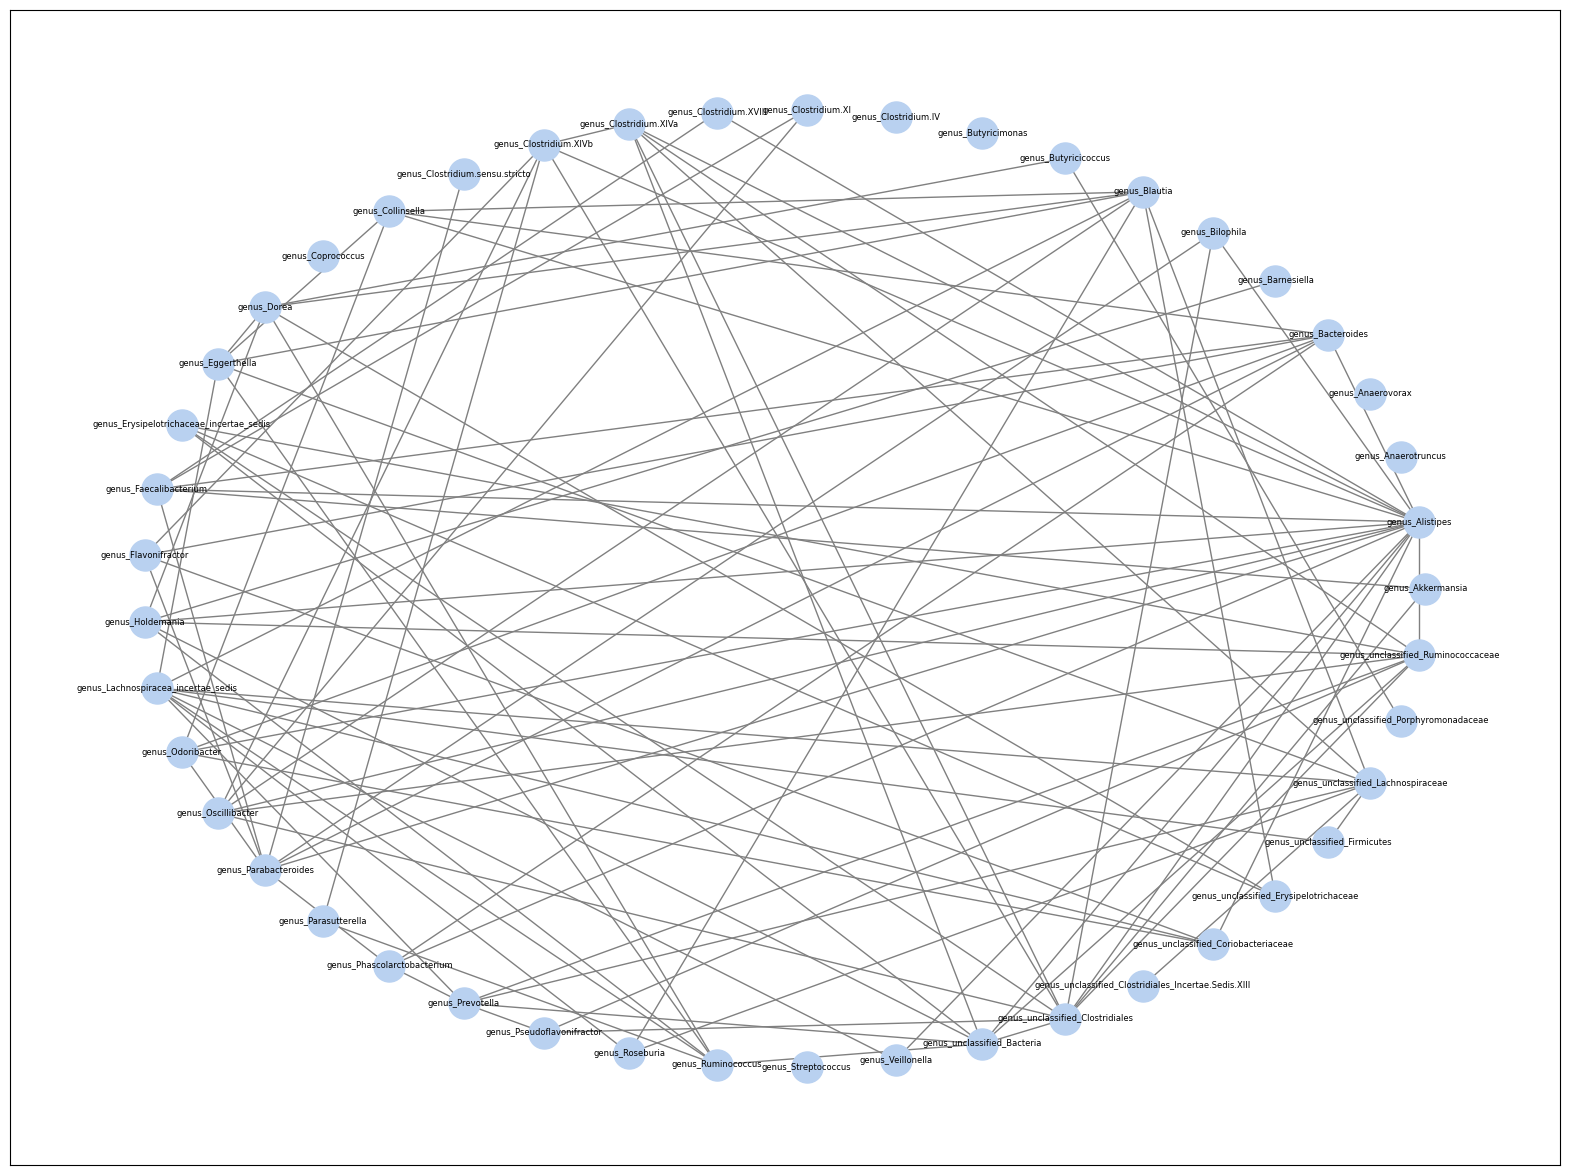

In [202]:
# IR CORRELATION NETWORK

rows, cols = np.where(matrix_IR == 1)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20,15))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list, style='dashed')
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=6, labels=graph_labels, with_labels=True, edge_color="gray", node_color='#b9d1f0')
plt.savefig('correlation_network_IR.png')

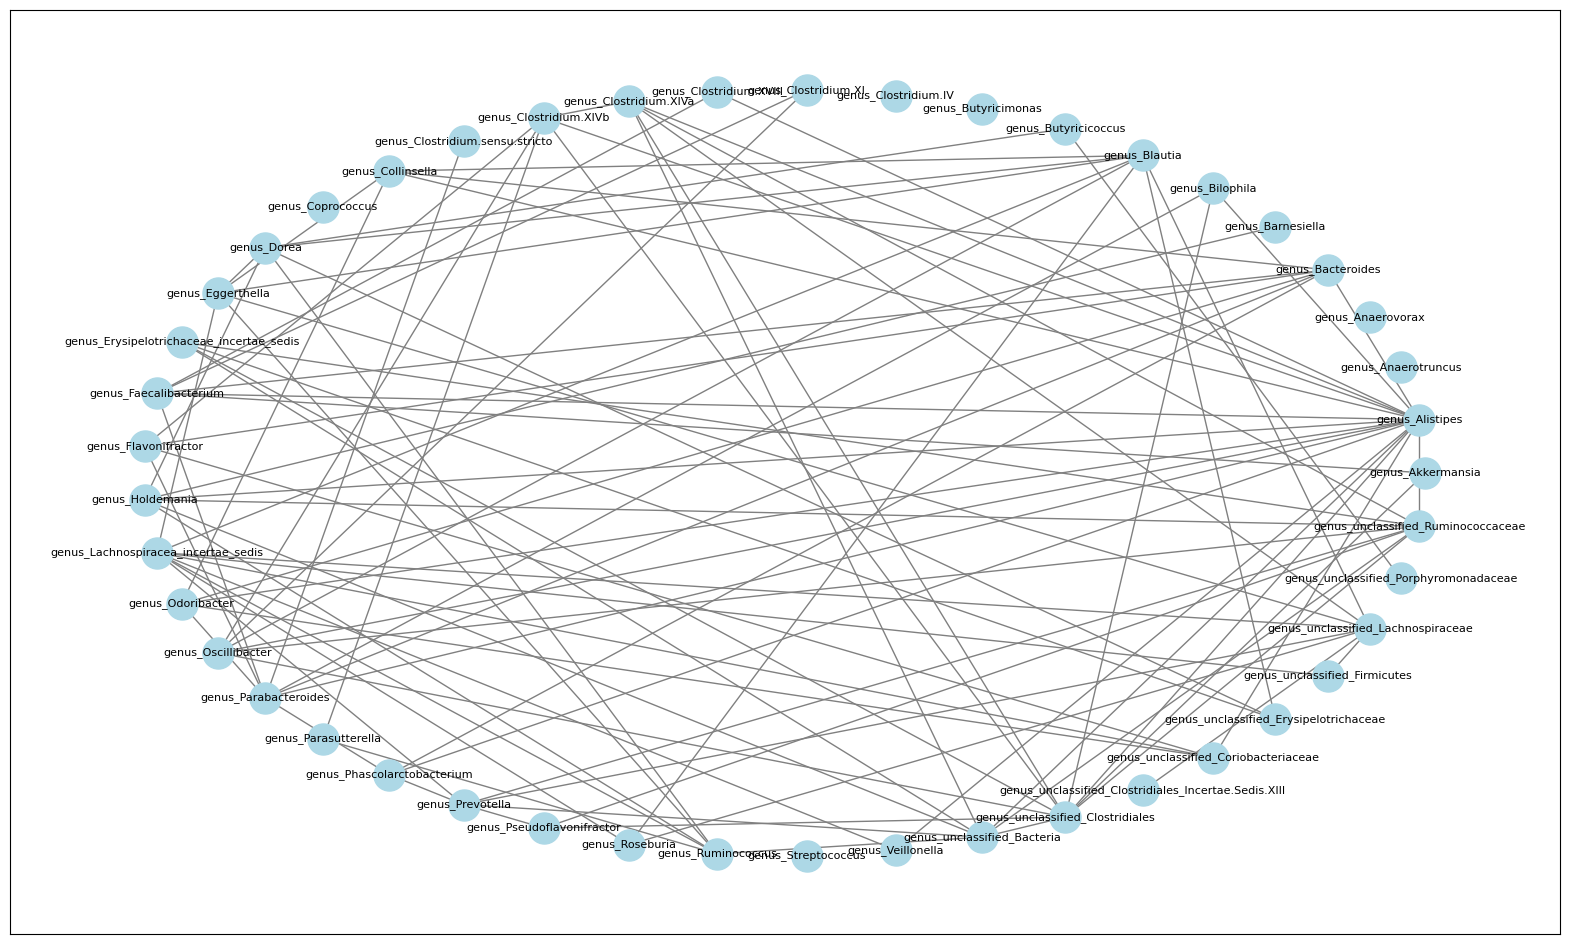

In [153]:
# IS CORRELATION NETWORK

rows, cols = np.where(matrix_IS == 1)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20,12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list, style='dashed')
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('correlation_network_IS.png')

In [102]:
def fisher(genus_A, genus_B, genus_C, data_treatment):
    fisherz_obj = CIT(data_treatment.values, "fisherz") # construct a CIT instance with data and method name
    pValue = fisherz_obj(genus_A, genus_B, genus_C)
    return pValue

def create_tuples(genus_lst, genus_a, genus_b):
    """
    Creates tuples of 2 combinations for all items in genus_lst except genus_a and genus_b.
    
    Args:
    genus_lst: A list of genus names.
    genus_a: The name of the first genus to exclude.
    genus_b: The name of the second genus to exclude.
    
    Returns:
    A list of tuples, where each tuple contains two distinct genus names from genus_lst,
    excluding genus_a and genus_b.
    """
    
    filtered_genus_lst = [x for x in range(len(genus_lst)) if (x != genus_a) and (x != genus_b)]
    combinations = list(itertools.combinations(filtered_genus_lst, 2))
    
    return combinations

In [154]:
matrix_IR_df = pd.DataFrame(matrix_IR, columns = genus_lst, index = genus_lst)
matrix_IS_df = pd.DataFrame(matrix_IS, columns = genus_lst, index = genus_lst)
clean_data = pd.read_csv("~/academics/DSC180A/data/clean.csv")
clean_data_IR = clean_data[clean_data['IRIS']=='IR']
clean_data_IR =clean_data_IR.iloc[::, :45]

clean_data_IS = clean_data[clean_data['IRIS']=='IS']
clean_data_IS =clean_data_IS.iloc[::, :45]

In [210]:
2 in np.unique(matrix_IR_after)

True

In [112]:
removed_edges_IR = {}

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IR_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            for k in range(len(genus_lst)):
                if k != i and k != j:
                    genus_C = [k]
                    p_value = fisher(genus_A, genus_B, genus_C, clean_data_IR)

                    if p_value < 0.05:
                        #update df
                        matrix_IR_df.iloc[i, j] = 0
                        removed_edges_IR[(i, j)] = [genus_C]
                        break

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IR_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            combinations = create_tuples(genus_lst, genus_A, genus_B)

            for k in combinations:
                genus_C = k
                p_value = fisher(genus_A, genus_B, list(genus_C), clean_data_IR)

                if p_value < 0.05:
                    #update df
                    matrix_IR_df.iloc[i, j] = 0
                    removed_edges_IR[(i, j)] = [genus_C]
                    break
                else:
                    matrix_IR_df.iloc[i, j] = 2

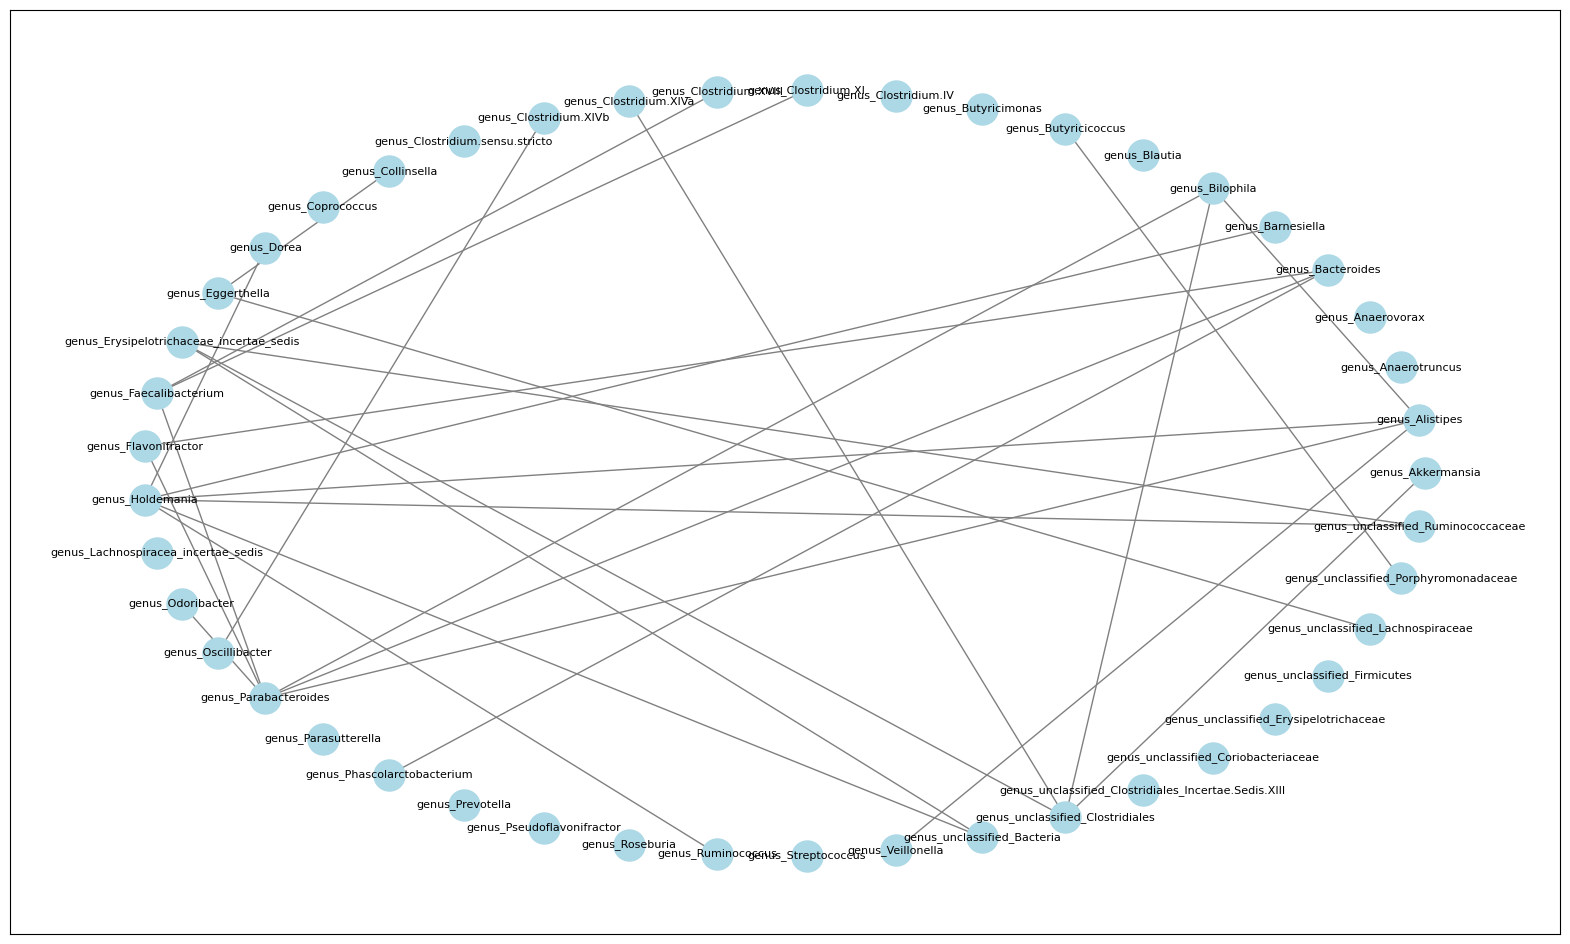

In [152]:
matrix_IR_after = matrix_IR_df.values

rows, cols = np.where(matrix_IR_after == 2)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20, 12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list)
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.9, iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('our_algresults_IR.png')

In [155]:
removed_edges_IS = {}

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IS_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            for k in range(len(genus_lst)):
                if k != i and k != j:
                    genus_C = [k]
                    p_value = fisher(genus_A, genus_B, genus_C, clean_data_IS)

                    if p_value < 0.05:
                        #update df
                        matrix_IS_df.iloc[i, j] = 0
                        removed_edges_IS[(i, j)] = [genus_C]
                        break

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IS_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            combinations = create_tuples(genus_lst, genus_A, genus_B)

            for k in combinations:
                genus_C = k
                p_value = fisher(genus_A, genus_B, list(genus_C), clean_data_IS)

                if p_value < 0.05:
                    #update df
                    matrix_IS_df.iloc[i, j] = 0
                    removed_edges_IS[(i, j)] = [genus_C]
                    break
                else:
                    matrix_IS_df.iloc[i, j] = 2

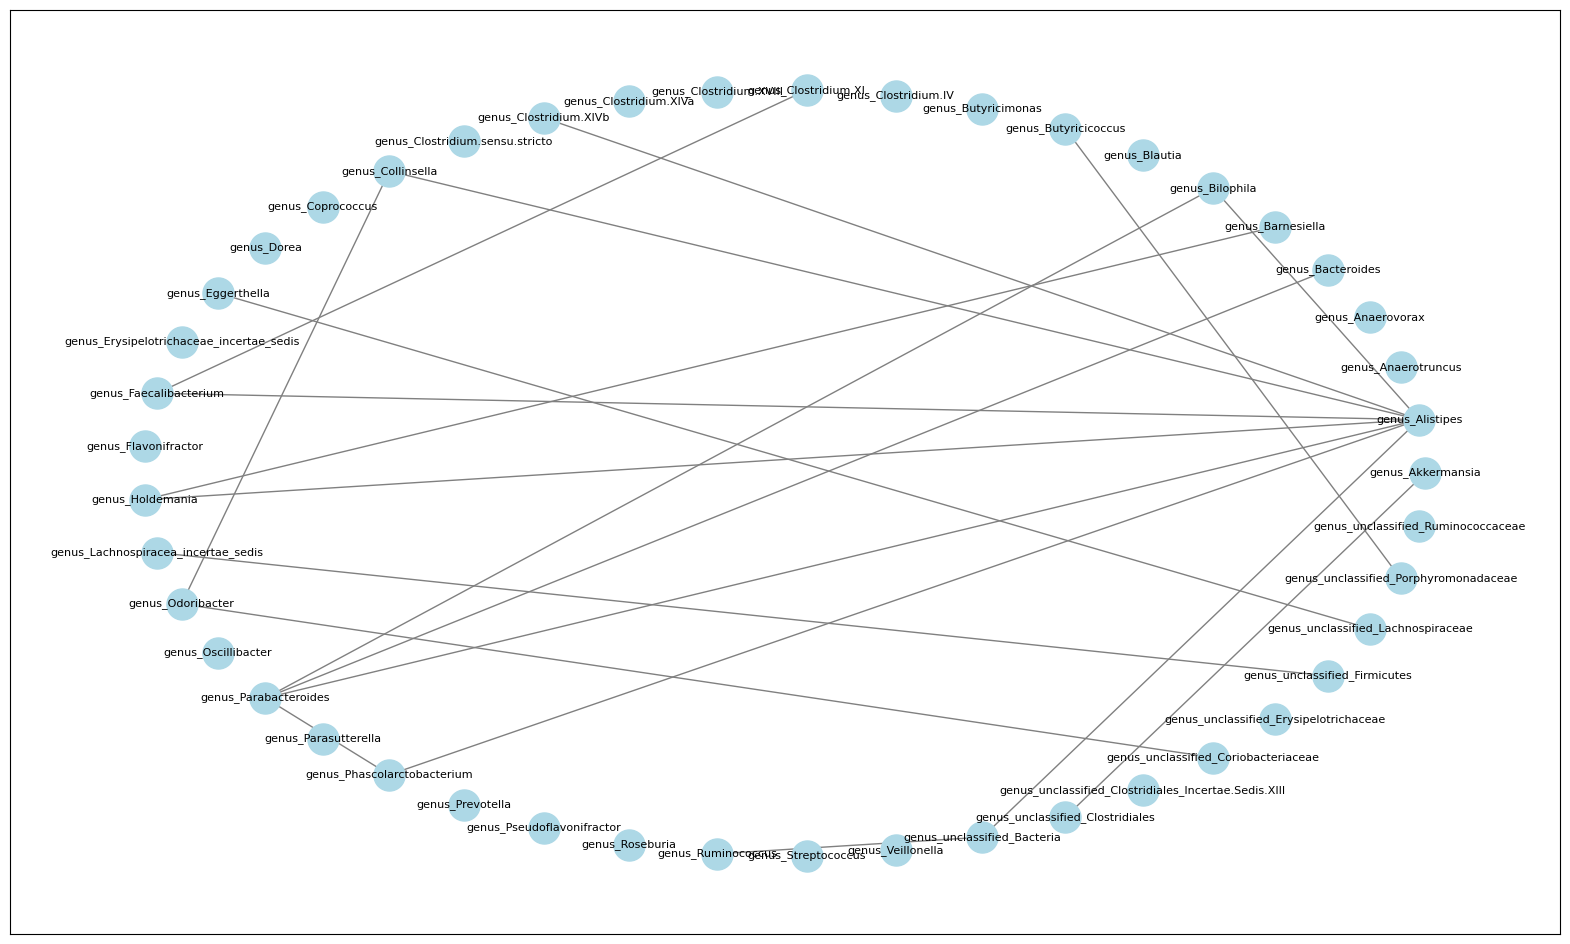

In [156]:
matrix_IS_after = matrix_IS_df.values

rows, cols = np.where(matrix_IS_after == 2)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20, 12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list)
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.9, iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('our_algresults_IS.png')

In [170]:
# SPARCC

matrix_IR_sparcc = np.zeros((len(genus_lst), len(genus_lst)))

for i, genus_A in enumerate(genus_lst):
  for j, genus_B in enumerate(genus_lst):
    if any((sparcc_IR_subset['genus_A'] == genus_A) & (sparcc_IR_subset['genus_B'] == genus_B)):
      matrix_IR_sparcc[i, j] = 1

matrix_IS_sparcc = np.zeros((len(genus_lst), len(genus_lst)))

for i, genus_A in enumerate(genus_lst):
  for j, genus_B in enumerate(genus_lst):
    if any((sparcc_IS_subset['genus_A'] == genus_A) & (sparcc_IS_subset['genus_B'] == genus_B)):
      matrix_IS_sparcc[i, j] = 1

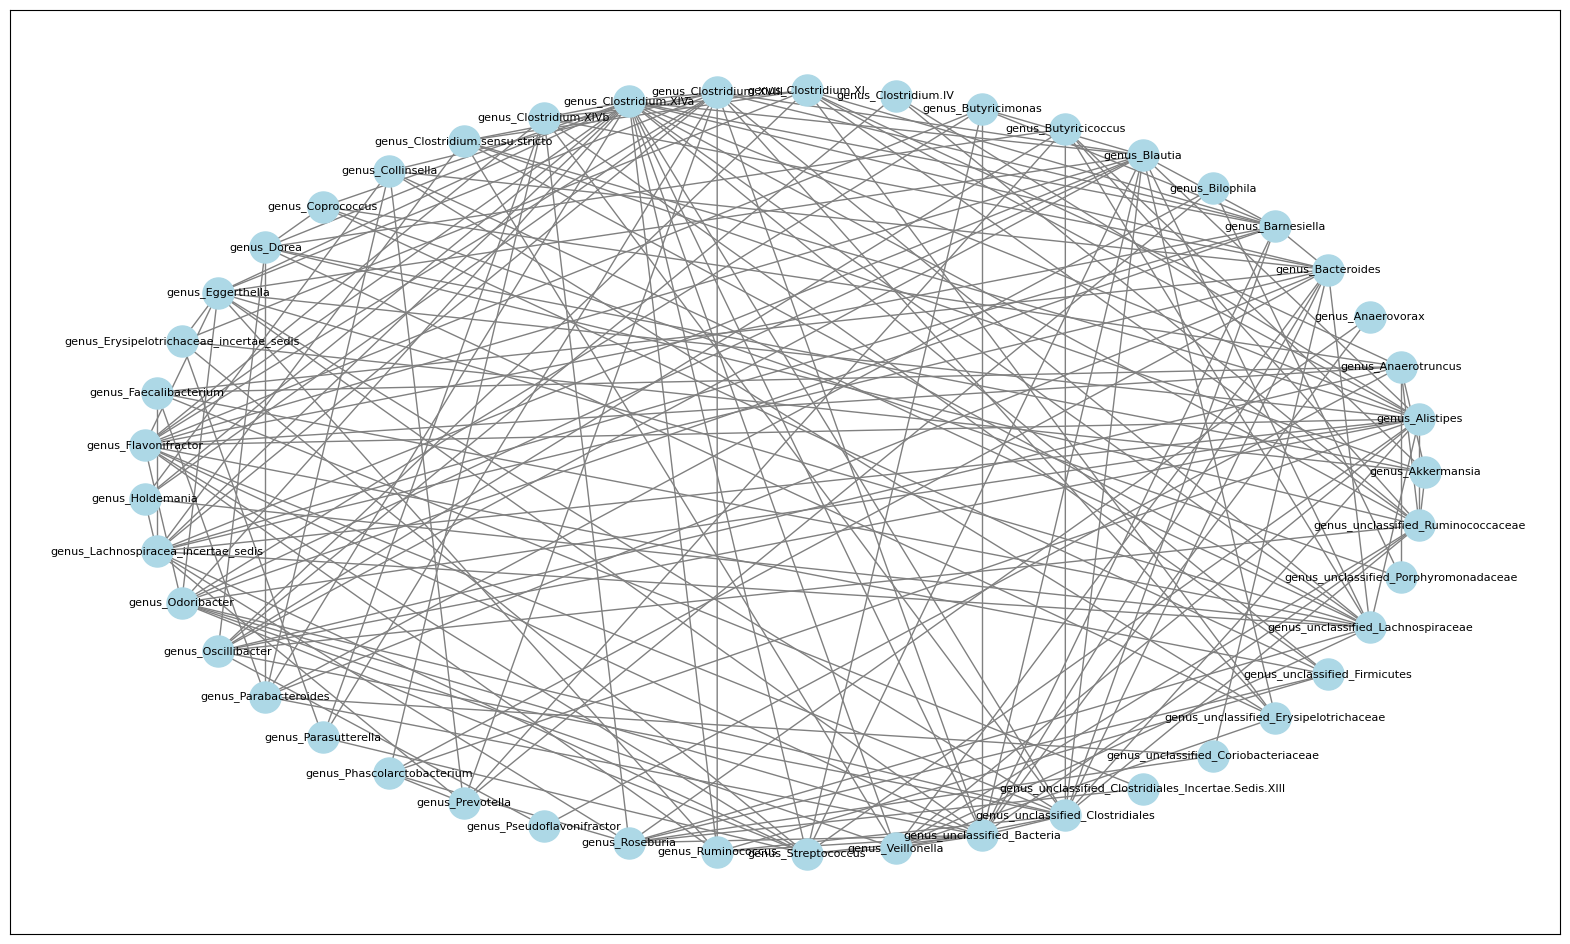

In [172]:
rows, cols = np.where(matrix_IR_sparcc == 1)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20,12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list, style='dashed')
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('correlation_network_IR_sparcc.png')

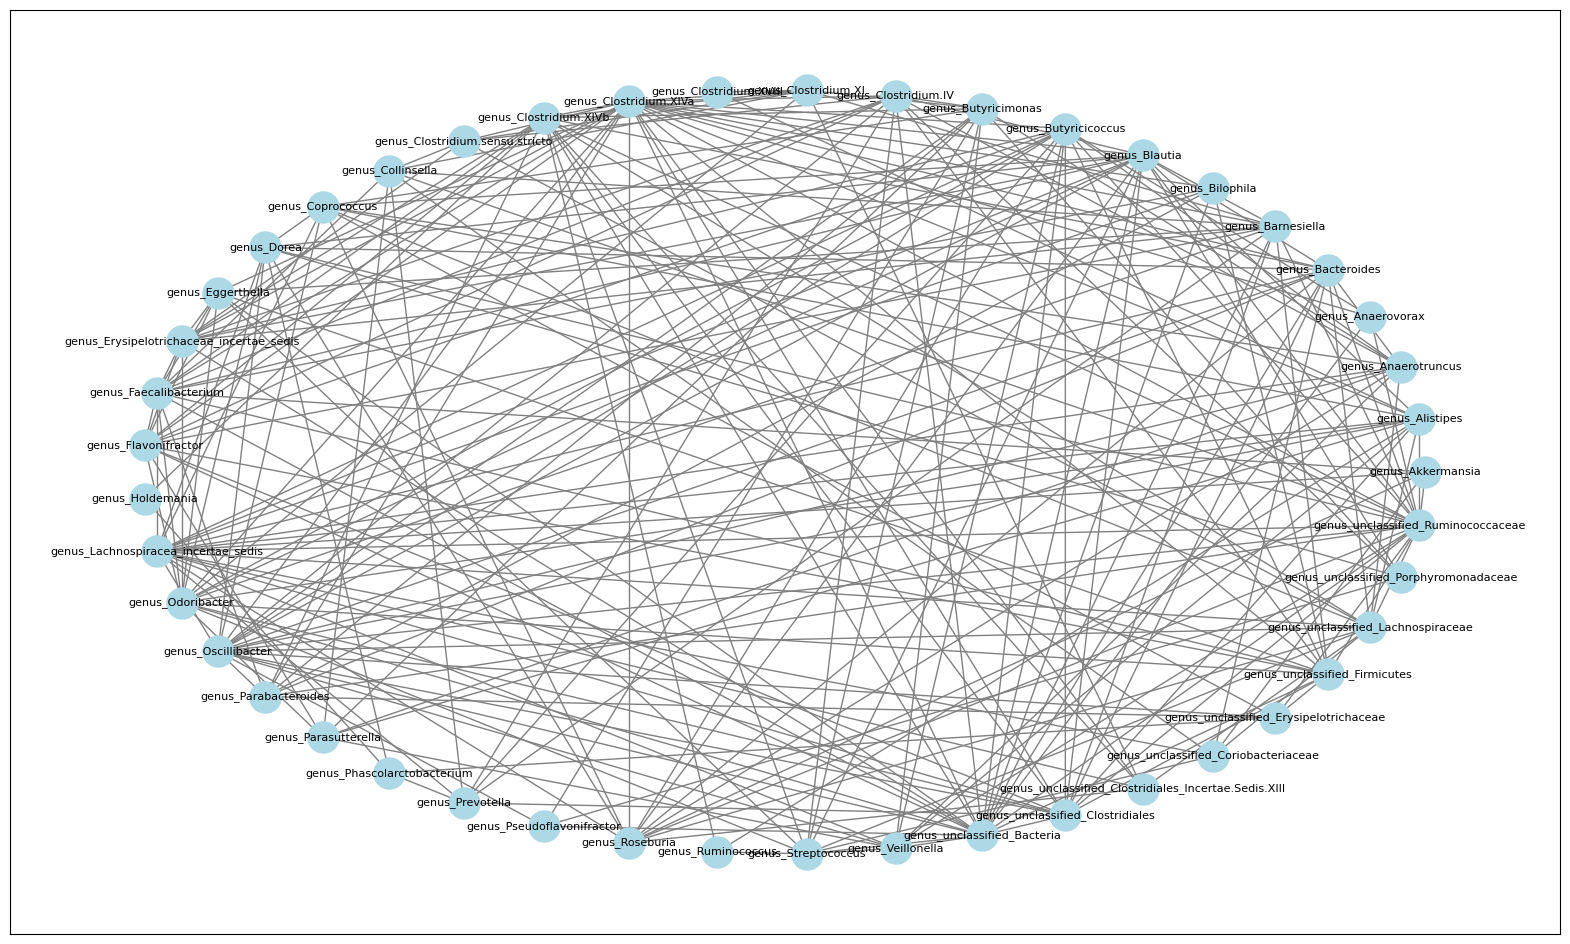

In [174]:
rows, cols = np.where(matrix_IS_sparcc == 1)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20,12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list, style='dashed')
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.3*1/np.sqrt(len(G.nodes())), iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('correlation_network_IS_sparcc.png')

In [173]:
matrix_IR_sparcc_df = pd.DataFrame(matrix_IR_sparcc, columns = genus_lst, index = genus_lst)
matrix_IS_sparcc_df = pd.DataFrame(matrix_IS_sparcc, columns = genus_lst, index = genus_lst)

In [175]:
removed_edges_IR_sparcc = {}

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IR_sparcc_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            for k in range(len(genus_lst)):
                if k != i and k != j:
                    genus_C = [k]
                    p_value = fisher(genus_A, genus_B, genus_C, clean_data_IR)

                    if p_value < 0.05:
                        #update df
                        matrix_IR_sparcc_df.iloc[i, j] = 0
                        removed_edges_IR_sparcc[(i, j)] = [genus_C]
                        break

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IR_sparcc_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            combinations = create_tuples(genus_lst, genus_A, genus_B)

            for k in combinations:
                genus_C = k
                p_value = fisher(genus_A, genus_B, list(genus_C), clean_data_IR)

                if p_value < 0.05:
                    #update df
                    matrix_IR_sparcc_df.iloc[i, j] = 0
                    removed_edges_IR_sparcc[(i, j)] = [genus_C]
                    break
                else:
                    matrix_IR_sparcc_df.iloc[i, j] = 2

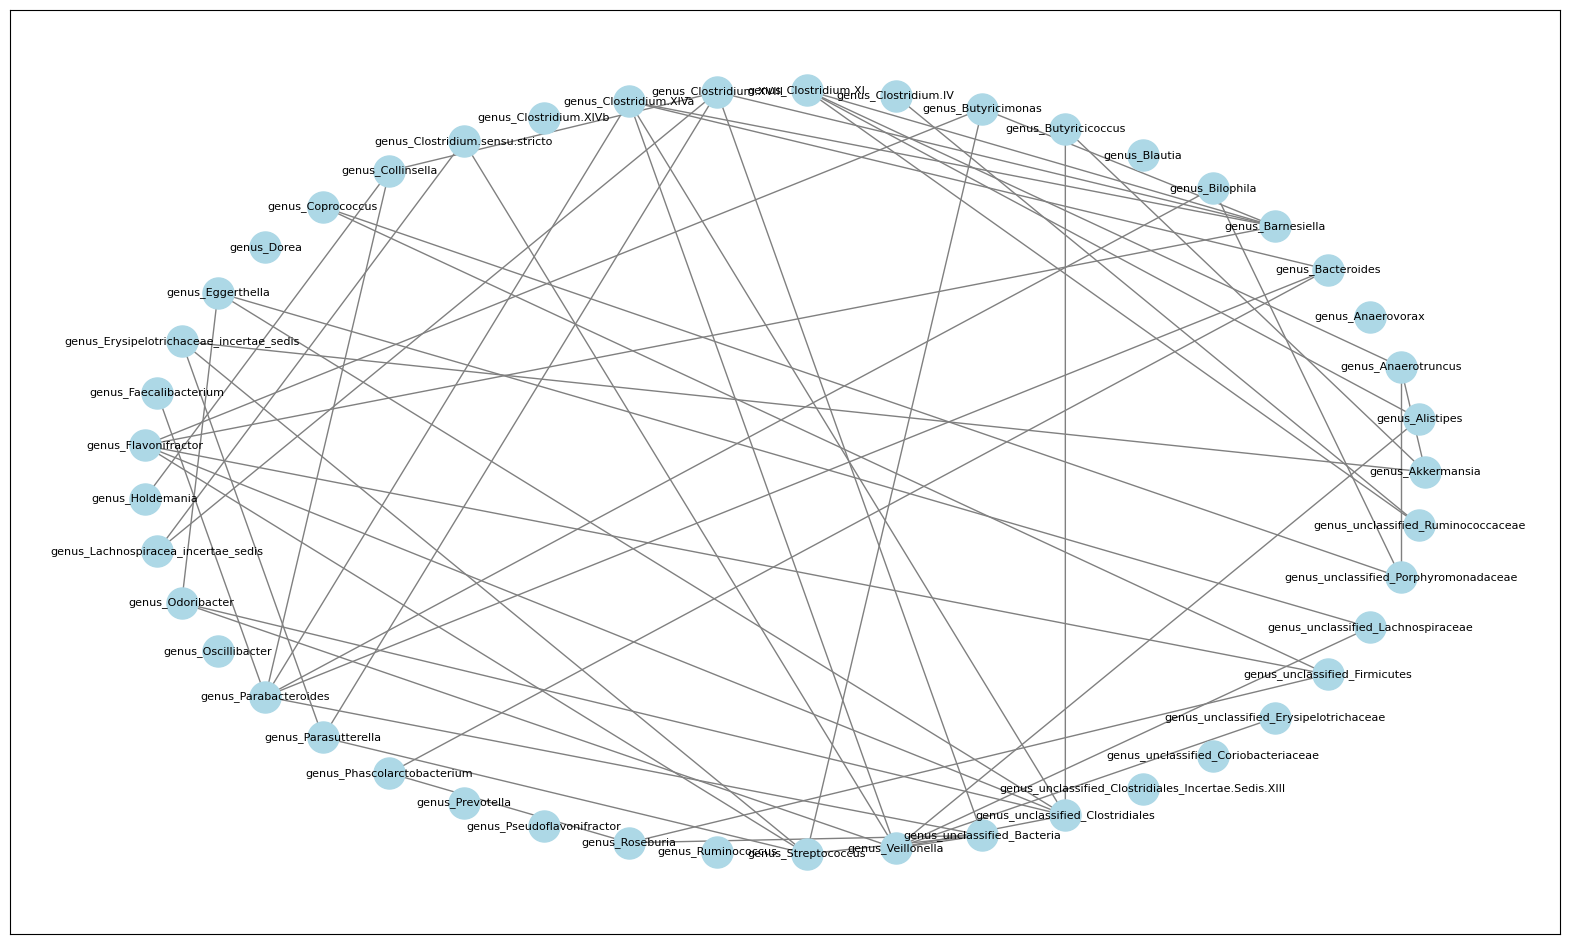

In [176]:
matrix_IR_sparcc_after = matrix_IR_sparcc_df.values

rows, cols = np.where(matrix_IR_sparcc_after == 2)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20, 12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list)
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.9, iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('our_algresults_IR_sparcc.png')

In [177]:
removed_edges_IS_sparcc = {}

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IS_sparcc_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            for k in range(len(genus_lst)):
                if k != i and k != j:
                    genus_C = [k]
                    p_value = fisher(genus_A, genus_B, genus_C, clean_data_IS)

                    if p_value < 0.05:
                        #update df
                        matrix_IS_sparcc_df.iloc[i, j] = 0
                        removed_edges_IS_sparcc[(i, j)] = [genus_C]
                        break

for i in range(len(genus_lst)):
    for j in range(len(genus_lst)):
        if matrix_IS_sparcc_df.iloc[i, j] == 1.0:
            genus_A = i
            genus_B = j
            combinations = create_tuples(genus_lst, genus_A, genus_B)

            for k in combinations:
                genus_C = k
                p_value = fisher(genus_A, genus_B, list(genus_C), clean_data_IS)

                if p_value < 0.05:
                    #update df
                    matrix_IS_sparcc_df.iloc[i, j] = 0
                    removed_edges_IS_sparcc[(i, j)] = [genus_C]
                    break
                else:
                    matrix_IS_sparcc_df.iloc[i, j] = 2

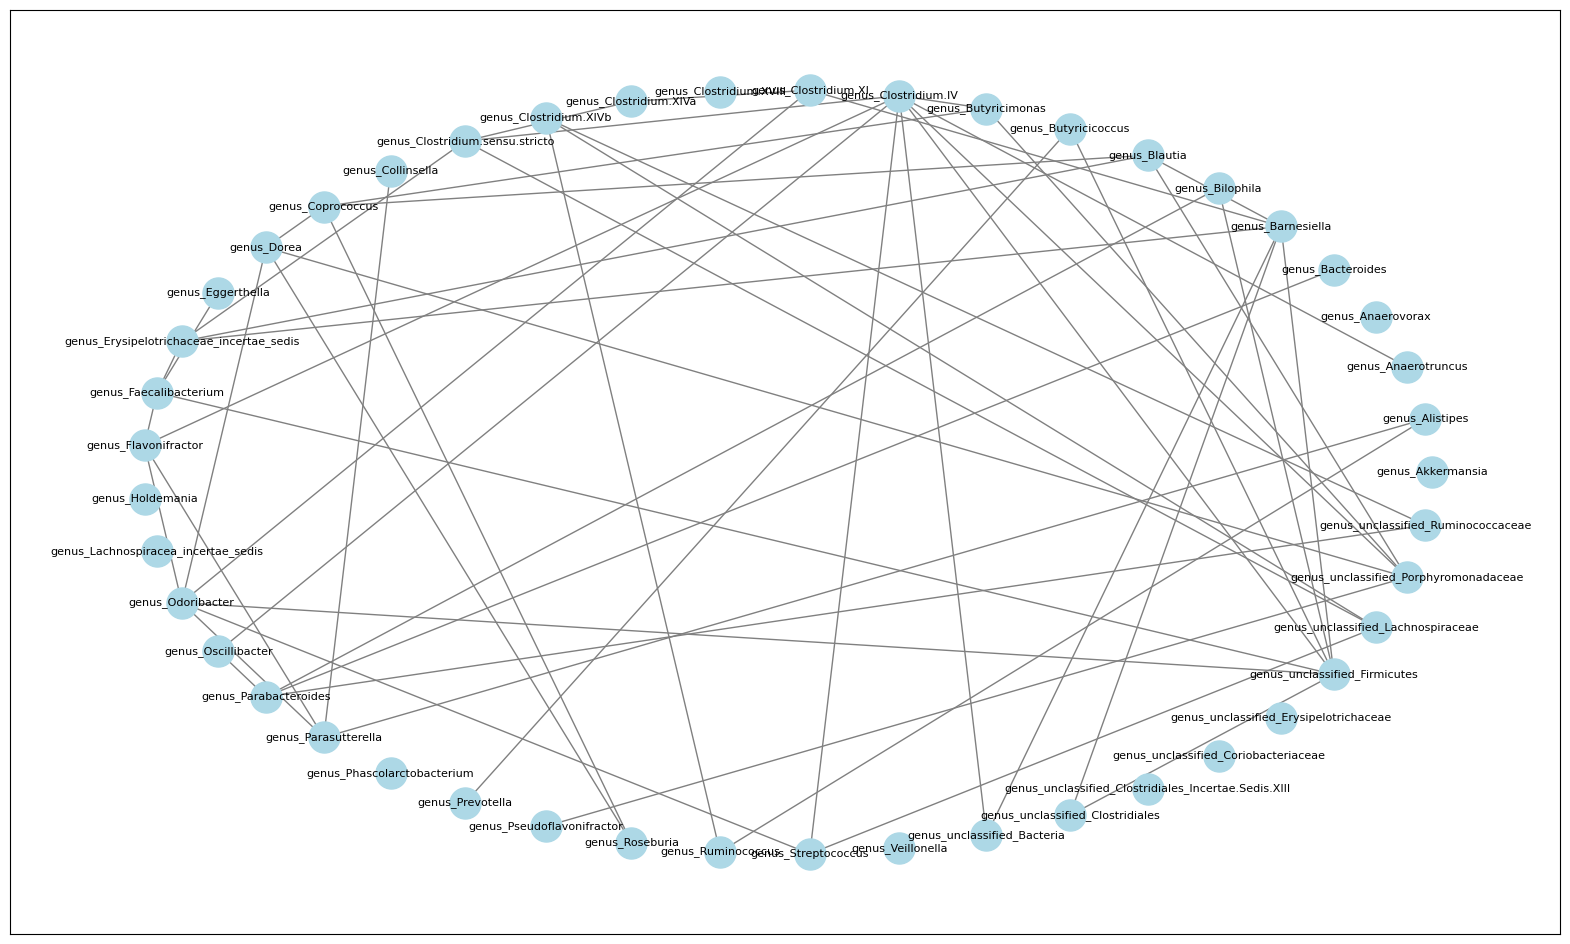

In [178]:
matrix_IS_sparcc_after = matrix_IS_sparcc_df.values

rows, cols = np.where(matrix_IS_sparcc_after == 2)
edges = zip(rows.tolist(), cols.tolist())
edges = zip(rows.tolist(), cols.tolist())
edge_list = list(edges)
graph_labels = {i: genus_lst[i]for i in range(len(genus_lst))}

plt.figure(figsize=(20, 12))
G = nx.Graph()
G.add_nodes_from(range(len(genus_lst)))
G.add_edges_from(edge_list)
# nx.set_node_attributes(G, graph_labels, 'label')
pos = nx.nx_pydot.graphviz_layout(G)
pos = nx.spring_layout(G, k=0.9, iterations=20)
pos_spaced = nx.fruchterman_reingold_layout(G, k=1, iterations=50, seed=1)
pos_spaced = nx.circular_layout(G)
nx.draw_networkx(G, pos_spaced, node_size=500, font_size=8, labels=graph_labels, with_labels=True, edge_color='gray', node_color='lightblue')
plt.savefig('our_algresults_IS_sparcc.png')